In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr, pearsonr

In [2]:
dataset = pd.read_csv("/Users/roniabuhanif/Downloads/BMKG/data_skripsi/uji_metode/allvar_ispa_all.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   Unnamed: 0    300 non-null    int64  
 2   KABKOT        300 non-null    object 
 3   month         300 non-null    int64  
 4   year          300 non-null    int64  
 5   longitude     300 non-null    float64
 6   latitude      300 non-null    float64
 7   pm2p5         300 non-null    float64
 8   time          300 non-null    object 
 9   RH            300 non-null    float64
 10  t2m           300 non-null    float64
 11  tp            300 non-null    float64
 12  ispa          300 non-null    int64  
 13  pm10          300 non-null    float64
 14  so2           300 non-null    float64
 15  ispa_balita   300 non-null    int64  
 16  ispa_5y       300 non-null    int64  
dtypes: float64(8), int64(7), object(2)
memory usage: 40.0+ KB


In [3]:
dataset = dataset.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   KABKOT       300 non-null    object 
 1   month        300 non-null    int64  
 2   year         300 non-null    int64  
 3   longitude    300 non-null    float64
 4   latitude     300 non-null    float64
 5   pm2p5        300 non-null    float64
 6   time         300 non-null    object 
 7   RH           300 non-null    float64
 8   t2m          300 non-null    float64
 9   tp           300 non-null    float64
 10  ispa         300 non-null    int64  
 11  pm10         300 non-null    float64
 12  so2          300 non-null    float64
 13  ispa_balita  300 non-null    int64  
 14  ispa_5y      300 non-null    int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 35.3+ KB


In [4]:
variables_ispa = ['ispa_5y','pm2p5','pm10','so2','RH','tp', 't2m']

Korelasi DKI Jakarta

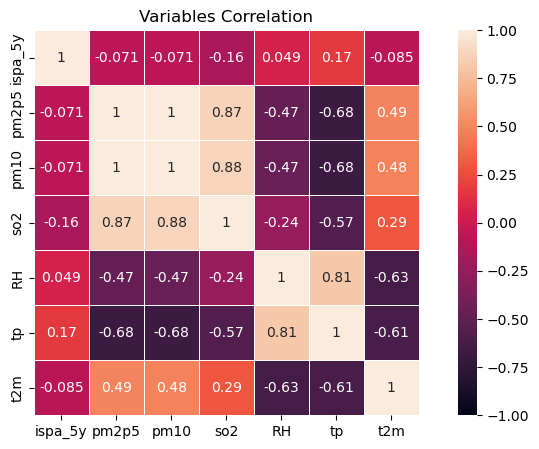

In [5]:
# correlation matrix
corr_matrix = dataset[variables_ispa].corr()

# Correlation between all variable with TB in West Jakarta 2022
plt.figure(figsize=(10, 5))
plt.title("Variables Correlation")
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5,  vmin=-1, vmax=1)
plt.show()

Pair Plot DKI Jakarta

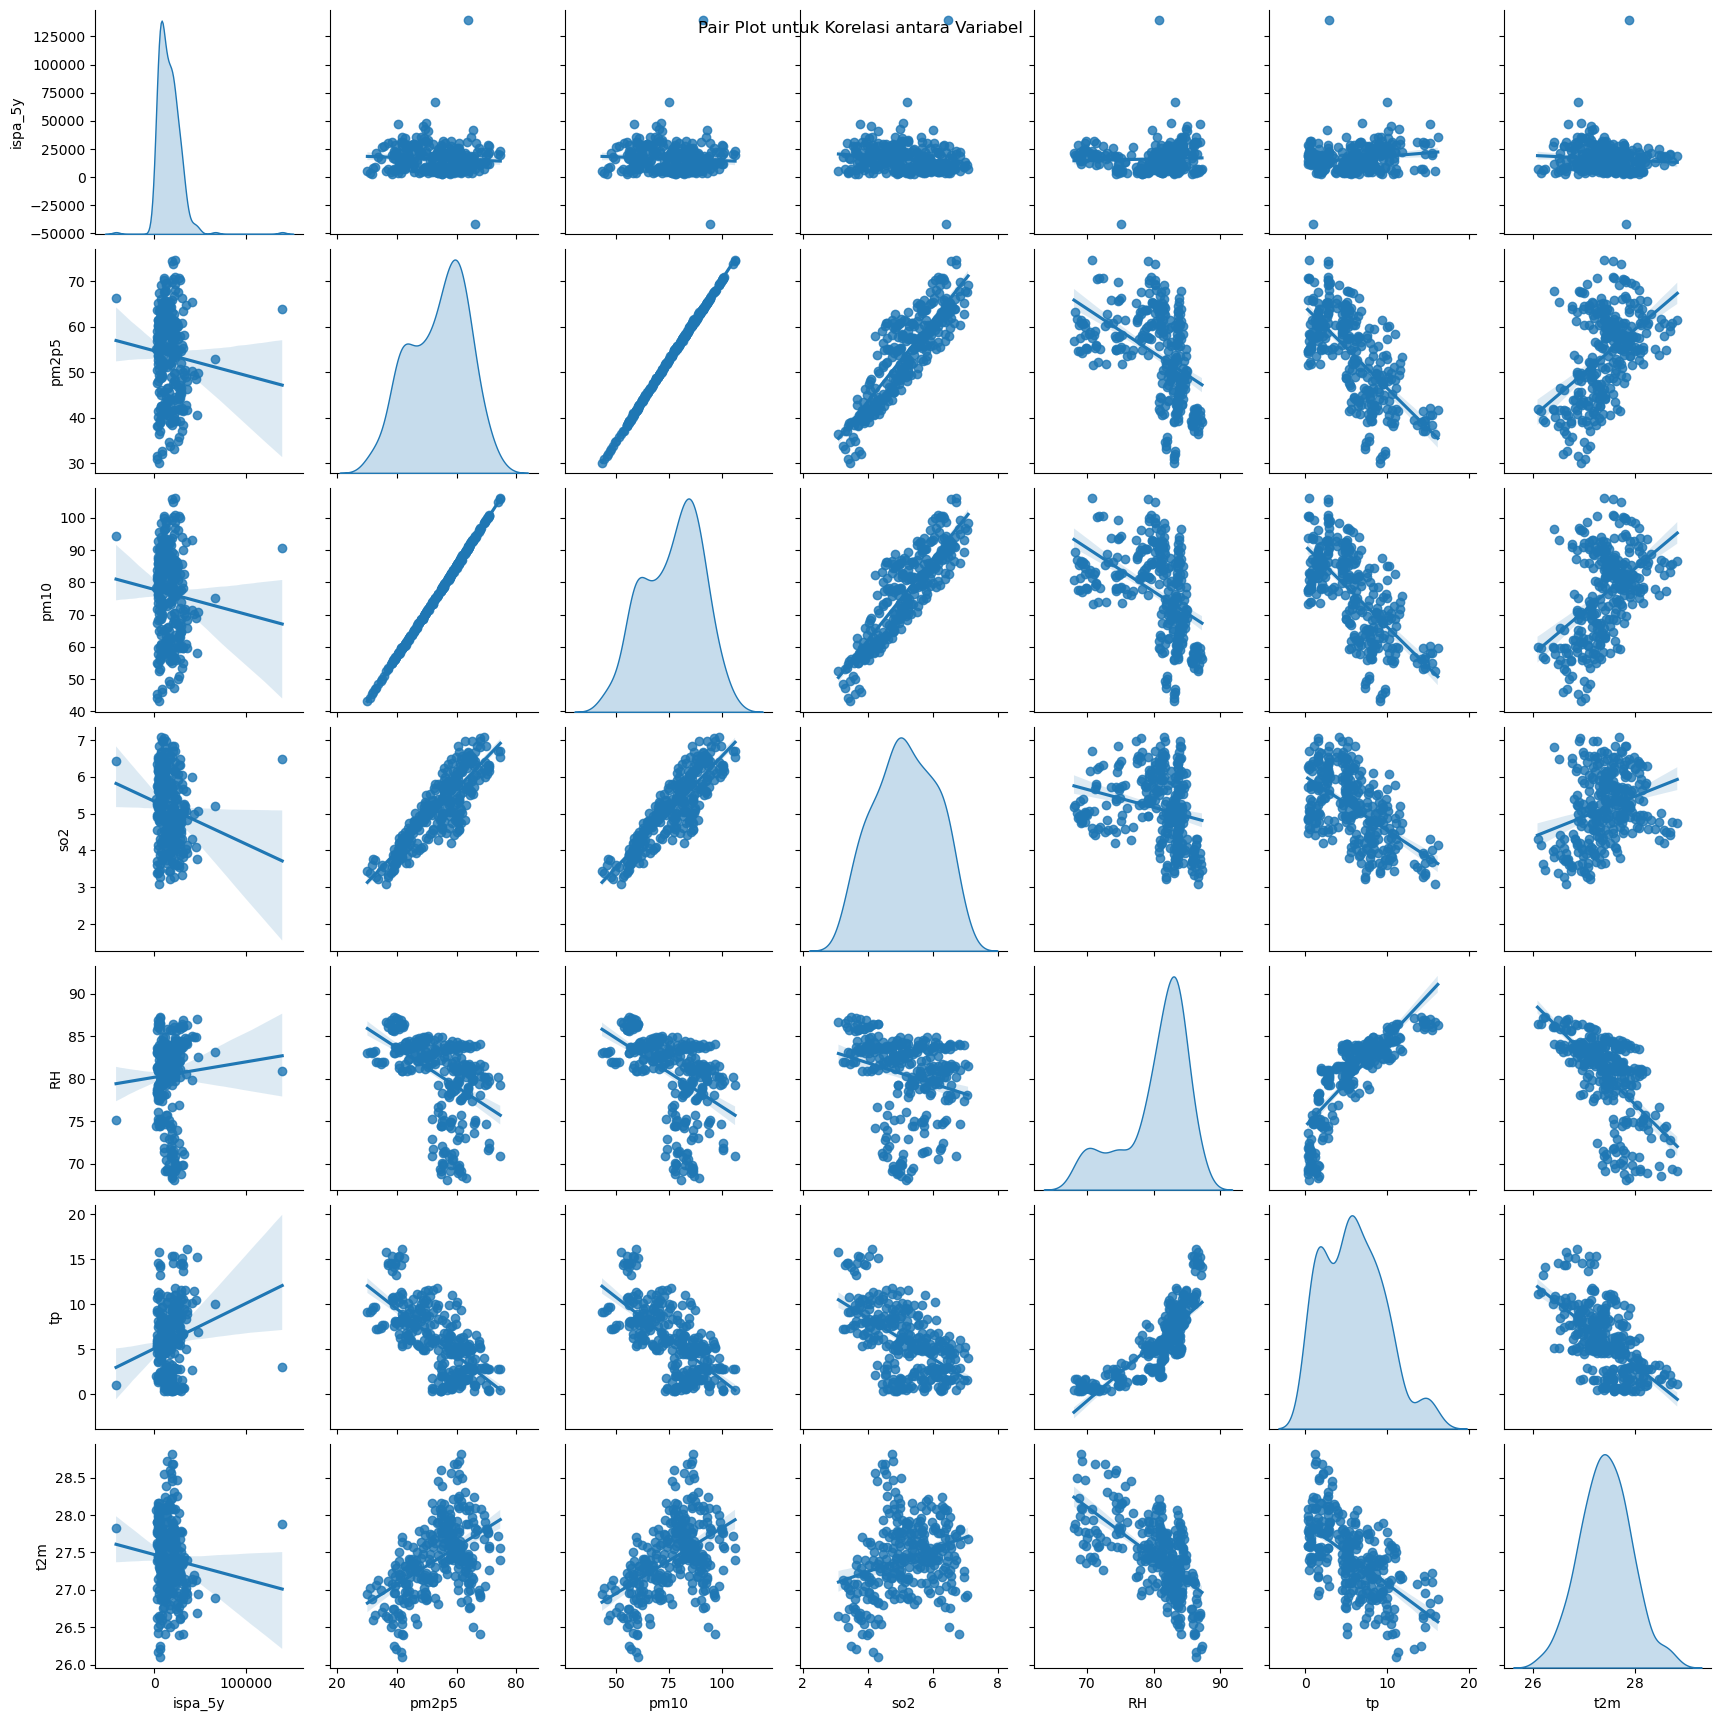

In [6]:
sns.pairplot(dataset[variables_ispa], kind="reg", diag_kind="kde")
plt.suptitle("Pair Plot untuk Korelasi antara Variabel")
plt.show()

Uji Spearman DKI Jakarta

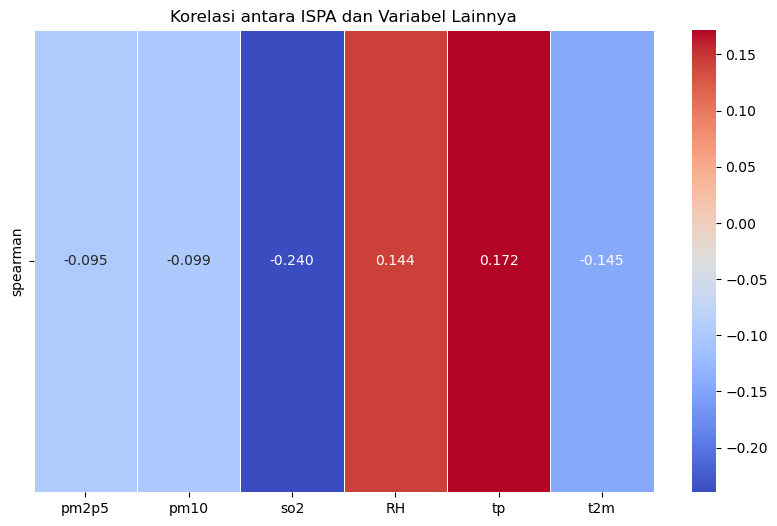

In [26]:
variables = ['pm2p5','pm10','so2','RH','tp', 't2m']
df_spearman = pd.DataFrame(index=['spearman'],columns=variables,)
df_pvalue_spearman = pd.DataFrame(index=['spearman'],columns=variables)

for variable in variables :
    spearmanr_corr,p_value = spearmanr(dataset['ispa_5y'],dataset[variable])
    df_spearman.at['spearman',variable]=spearmanr_corr
    df_pvalue_spearman.at['spearman',variable]=p_value
    
plt.figure(figsize=(10,6))
sns.heatmap(df_spearman.astype(float),annot=True,cmap='coolwarm', fmt='.3f', linewidths=.7)
plt.title('Korelasi antara ISPA dan Variabel Lainnya')
plt.show()

In [8]:
print(df_pvalue_spearman)

            pm2p5      pm10       so2        RH        tp       t2m
spearman  0.09253  0.077687  0.000008  0.042063  0.008497  0.034486


Uji Korelasi Kabkot

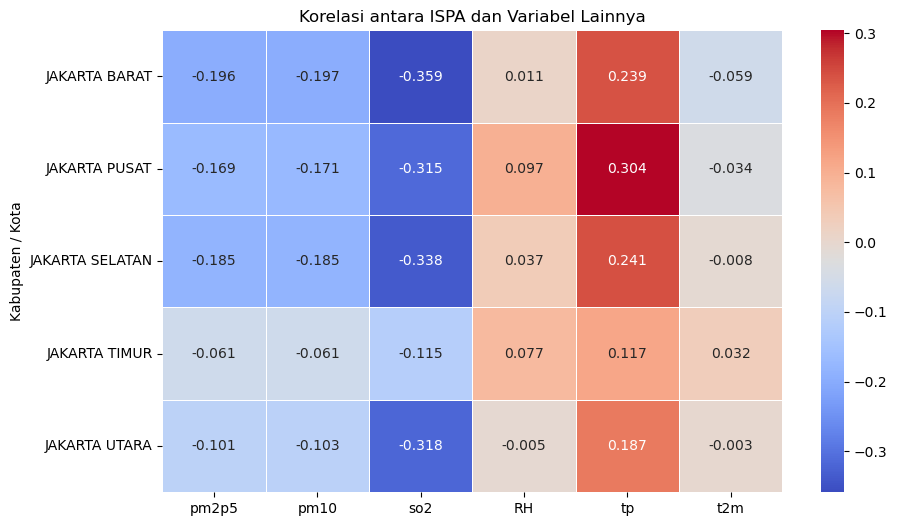

In [27]:
variables = ['pm2p5','pm10','so2','RH','tp', 't2m']
areas = dataset['KABKOT'].unique()

df_corr_kabkot = pd.DataFrame(index=[areas],columns=variables)
df_pvalue_kabkot = pd.DataFrame(index=[areas],columns=variables)

for variable in variables:
    for area in areas:
        spearmanr_corr, p_value = pearsonr(dataset[dataset['KABKOT'] == area]['ispa_5y'], dataset[dataset['KABKOT'] == area][variable])
        df_corr_kabkot.at[area,variable]=spearmanr_corr
        df_pvalue_kabkot.at[area,variable]=p_value
        
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df_corr_kabkot.astype(float),annot=True,cmap='coolwarm', fmt='.3f', linewidths=.7)
heatmap.set_ylabel("Kabupaten / Kota")
plt.title('Korelasi antara ISPA dan Variabel Lainnya')
plt.show()

In [14]:
df_pvalue_kabkot = df_pvalue_kabkot.rename_axis('KABKOT').reset_index()
print(df_pvalue_kabkot)

            KABKOT     pm2p5      pm10       so2        RH        tp       t2m
0    JAKARTA BARAT  0.133847  0.132124   0.00487  0.930584  0.066041  0.653296
1    JAKARTA PUSAT  0.197783  0.190613  0.014339  0.460687  0.018144  0.797088
2  JAKARTA SELATAN  0.156387  0.156378  0.008263  0.779052  0.063332  0.953401
3    JAKARTA TIMUR  0.642066  0.641849  0.380037  0.559211  0.375005  0.807179
4    JAKARTA UTARA  0.442693   0.43506   0.01342  0.967726  0.152082  0.984383


In [15]:
df_pvalue_kabkot.info()
df_pvalue_kabkot[variables]=df_pvalue_kabkot[variables].apply(pd.to_numeric)

print(df_pvalue_kabkot)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   KABKOT  5 non-null      object
 1   pm2p5   5 non-null      object
 2   pm10    5 non-null      object
 3   so2     5 non-null      object
 4   RH      5 non-null      object
 5   tp      5 non-null      object
 6   t2m     5 non-null      object
dtypes: object(7)
memory usage: 412.0+ bytes
            KABKOT     pm2p5      pm10       so2        RH        tp       t2m
0    JAKARTA BARAT  0.133847  0.132124  0.004870  0.930584  0.066041  0.653296
1    JAKARTA PUSAT  0.197783  0.190613  0.014339  0.460687  0.018144  0.797088
2  JAKARTA SELATAN  0.156387  0.156378  0.008263  0.779052  0.063332  0.953401
3    JAKARTA TIMUR  0.642066  0.641849  0.380037  0.559211  0.375005  0.807179
4    JAKARTA UTARA  0.442693  0.435060  0.013420  0.967726  0.152082  0.984383


Grafik P-Value Variabel

<Figure size 1200x600 with 0 Axes>

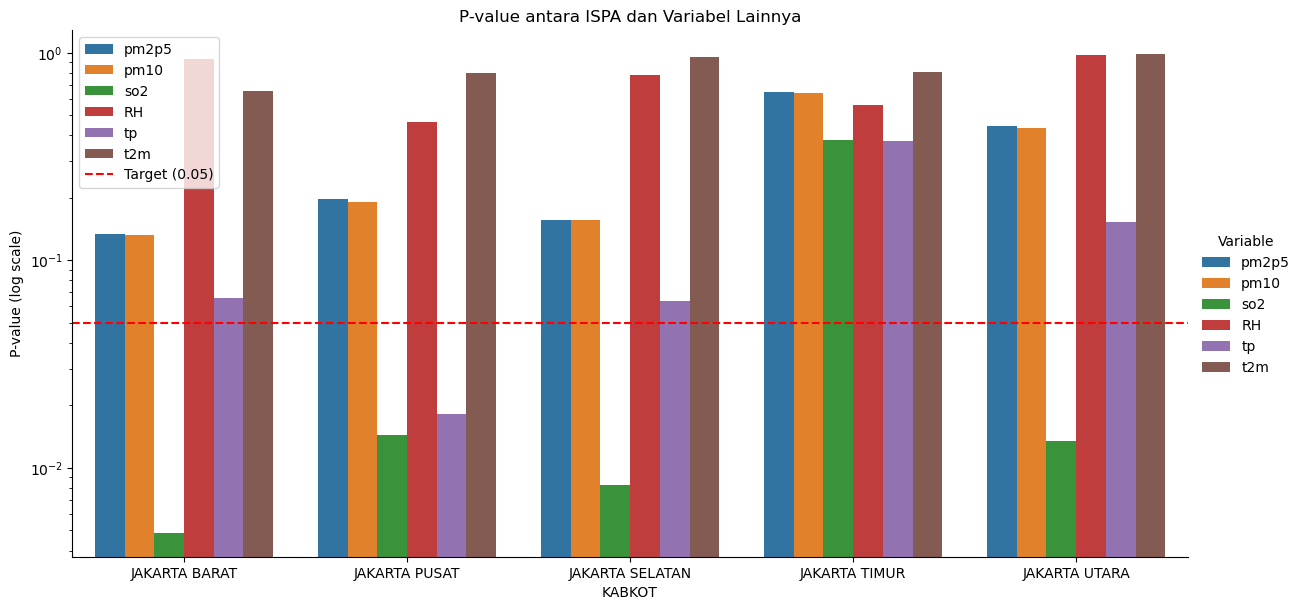

In [16]:
plt.figure(figsize=(12, 6))
plot = sns.catplot(data=df_pvalue_kabkot.melt(id_vars='KABKOT', var_name='Variable', value_name='P-value'),
                   x='KABKOT', y='P-value', hue='Variable', kind='bar', height=6, aspect=2)

# Menambahkan garis target
plt.yscale('log')  # Menggunakan skala logaritmik untuk p-value yang kecil
plt.title('P-value antara ISPA dan Variabel Lainnya')
plt.ylabel('P-value (log scale)')
plt.xlabel('KABKOT')

# Menambahkan garis target pada nilai 0.05
plt.axhline(y=0.05, color='r', linestyle='--', label='Target (0.05)')
plt.legend()

# Menampilkan plot
plt.show()

Regression Results (Table)

In [17]:
import statsmodels.api as sm

X = dataset[['pm2p5', 'pm10', 'so2', 'RH', 'tp', 't2m']]
X = sm.add_constant(X)
y = dataset['ispa_5y']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                ispa_5y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     4.568
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           0.000189
Time:                        16:42:48   Log-Likelihood:                -3247.4
No. Observations:                 300   AIC:                             6509.
Df Residuals:                     293   BIC:                             6535.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.046e+05   6.53e+04      1.600      0.1

Grafik Regresi Linear

Koefisien Regresi: 158.12129366858613
Intercept: 3192.93900747141
Mean Squared Error: 112507975.28900227


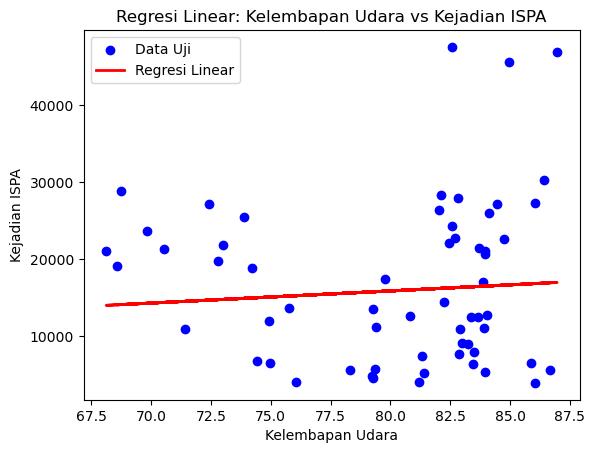

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Misal X adalah kualitas udara dan Y adalah kejadian TB paru
X = dataset['RH'].values.reshape(-1, 1)
Y = dataset['ispa_5y'].values

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, Y_train)

# Membuat prediksi menggunakan data uji
Y_pred = model.predict(X_test)

# Menampilkan koefisien regresi dan intercept
print('Koefisien Regresi:', model.coef_[0])
print('Intercept:', model.intercept_)

# Evaluasi kinerja model
mse = np.mean((Y_pred - Y_test)**2)
print('Mean Squared Error:', mse)

# Visualisasi hasil regresi
plt.scatter(X_test, Y_test, color='blue', label='Data Uji')
plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Regresi Linear')
plt.xlabel('Kelembapan Udara')
plt.ylabel('Kejadian ISPA')
plt.title('Regresi Linear: Kelembapan Udara vs Kejadian ISPA')
plt.legend()
plt.show()


In [19]:
## Korelasi dengan Time Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, ccf

Autokorelasi ISPA

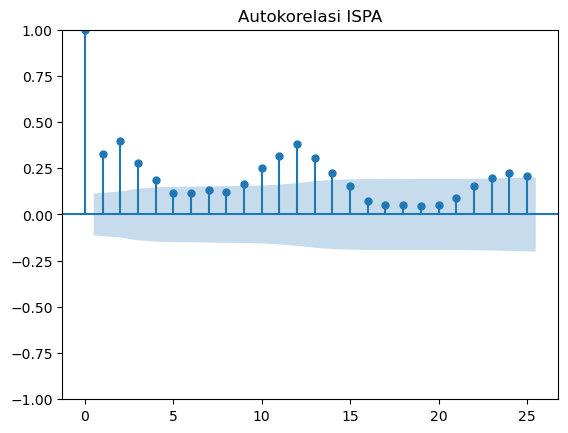

In [20]:
# Visualisasi autokorelasi
plot_acf(dataset['ispa_5y'])
plt.title('Autokorelasi ISPA')
plt.show()

# Menghitung autokorelasi
autocorrelation_ispa = acf(dataset['ispa_5y'])


In [21]:
print(autocorrelation_ispa)

[1.         0.32585502 0.39513906 0.28068056 0.18401622 0.11558633
 0.1184735  0.13043712 0.11893845 0.1646189  0.2501763  0.31528272
 0.38126316 0.30773789 0.22341093 0.15341116 0.07140583 0.05286352
 0.05237293 0.04649203 0.05215098 0.09051171 0.15478887 0.19917553
 0.22629019]


Cross Correlation

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_30063/1619648207.py:7: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  cross_correlation = ccf(dataset['ispa_5y'], dataset[variable], unbiased=True)


Cross-correlation antara ISPA dan pm2p5:
[-7.10370492e-02 -8.43578722e-02 -4.04579305e-03  1.12118454e-01
  1.80117139e-01  2.26775819e-01  1.80458397e-01  1.74986969e-01
  1.39681989e-01  1.13410710e-01  5.07920553e-02  9.45993699e-03
 -6.04093919e-02 -6.52078559e-02  9.92728136e-03  1.36802399e-01
  1.91029655e-01  2.30323549e-01  1.84878212e-01  1.76184184e-01
  1.28639828e-01  1.00378886e-01  2.46822737e-02 -1.98606708e-02
 -9.97896903e-02 -8.31149808e-02 -1.51916792e-02  1.20001565e-01
  1.69594553e-01  2.00601166e-01  1.48499260e-01  1.43263227e-01
  8.89794596e-02  6.52801697e-02 -1.15510363e-02 -5.97999943e-02
 -1.42363200e-01 -9.64433440e-02 -2.26692518e-02  1.23751712e-01
  1.57344895e-01  1.59726697e-01  1.35710375e-01  8.79433282e-02
  7.69629409e-02  3.31345293e-02  4.82881320e-03 -1.13681973e-01
 -1.48424547e-01 -1.02330684e-01 -4.22807813e-02  1.10249292e-01
  1.63054649e-01  2.05571794e-01  1.78019815e-01  1.35641271e-01
  1.40664646e-01  1.05779527e-01  8.72872124e-02 

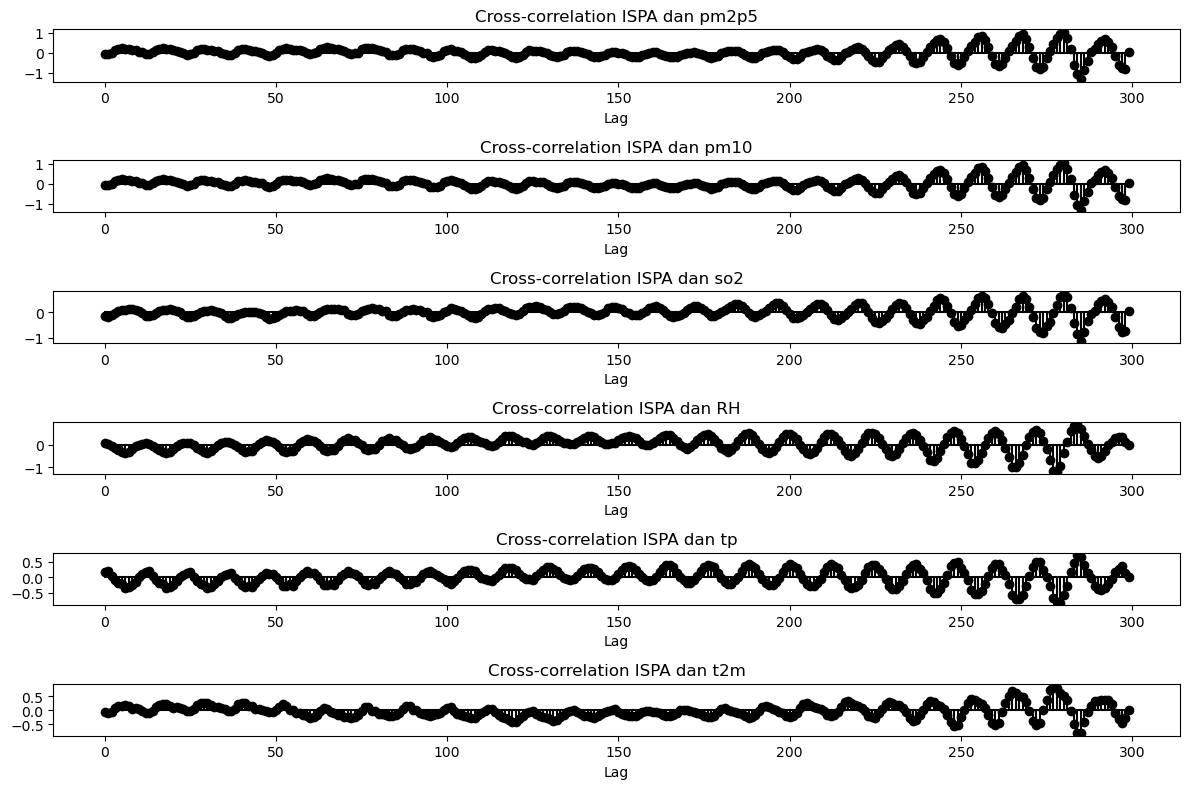

In [22]:
variables = ['pm2p5','pm10','so2','RH','tp', 't2m']
plt.figure(figsize=(12,8))

for variable in variables:
    # Visualisasi cross-correlation
    lags = range(len(dataset))
    cross_correlation = ccf(dataset['ispa_5y'], dataset[variable], unbiased=True)

    plt.subplot(len(variables), 1, variables.index(variable) + 1)
    plt.stem(lags, cross_correlation, linefmt="k-", markerfmt='ko', basefmt="k-")
    plt.title(f'Cross-correlation ISPA dan {variable}')
    plt.xlabel('Lag')

    # Menampilkan hasil cross-correlation
    print(f'Cross-correlation antara ISPA dan {variable}:\n{cross_correlation}\n')

plt.tight_layout()
plt.show()

In [23]:
cross_correlation = ccf(dataset['ispa_5y'], dataset['tp'], unbiased=True)
print(cross_correlation)

[ 1.72766600e-01  2.04617806e-01  3.58926003e-02 -8.21150640e-02
 -1.76897841e-01 -2.15132986e-01 -3.46740489e-01 -3.16554689e-01
 -2.48577566e-01 -1.41314600e-01  3.83398912e-03  8.85610817e-02
  1.62965379e-01  1.89068032e-01  2.34688803e-02 -9.16354715e-02
 -2.00543411e-01 -2.34718440e-01 -3.55056876e-01 -3.22407608e-01
 -2.48162211e-01 -1.30879642e-01  7.80864154e-03  8.16123276e-02
  1.37660119e-01  1.59682973e-01 -2.25574493e-03 -1.21759576e-01
 -2.23111729e-01 -2.49741294e-01 -3.58895677e-01 -3.09291371e-01
 -2.31560515e-01 -1.08133014e-01  1.25957886e-02  8.41685907e-02
  1.17839460e-01  1.29111458e-01 -1.23429431e-02 -1.24400837e-01
 -2.42885917e-01 -3.03069919e-01 -2.77757569e-01 -3.14927323e-01
 -2.00887094e-01 -7.44418660e-02  4.63230144e-02  1.49118953e-01
  1.14878817e-01  1.02898661e-01  8.17596176e-03 -9.16627807e-02
 -2.68206354e-01 -2.80279344e-01 -2.21832769e-01 -2.72083981e-01
 -1.30372303e-01 -2.15282760e-04  1.00478841e-01  1.92253896e-01
  1.30939957e-01  1.19878

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_30063/2107169498.py:1: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  cross_correlation = ccf(dataset['ispa_5y'], dataset['tp'], unbiased=True)
